# 1.Data Preparation:

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
df_apps = pd.read_csv('apps.csv')
df_apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [6]:
df_apps.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [7]:
df_apps.duplicated().any()

False

In [8]:
df_apps.shape

(9659, 14)

In [9]:
# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ['Installs','Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    for char in chars_to_remove:
        # Replace the character with an empty string
        df_apps[col] = df_apps[col].apply(lambda x: x.replace(char,''))
        
# Print a summary of the apps dataframe
df_apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
df_apps['Installs'] = df_apps['Installs'].astype('float')

# Convert Price to float data type
df_apps['Price'] = df_apps['Price'].astype('float')

# Checking dtypes of the apps dataframe
print(df_apps.dtypes)

df_apps 

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 2.Category Exploration:

In [17]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(df_apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = df_apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


# 3.Metrics Analysis:

In [19]:
# Average rating of apps
avg_app_rating =df_apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = df_apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


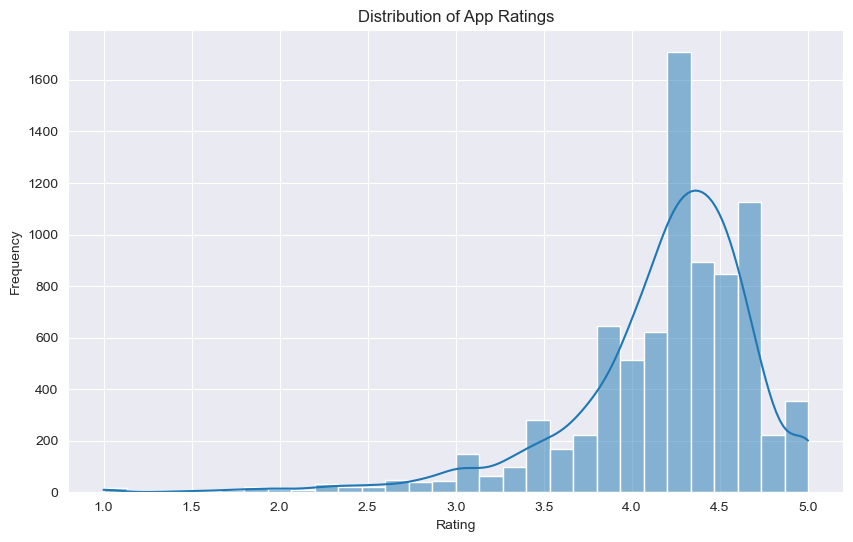

In [31]:
# Ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_apps['Rating'].dropna(), bins=30, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

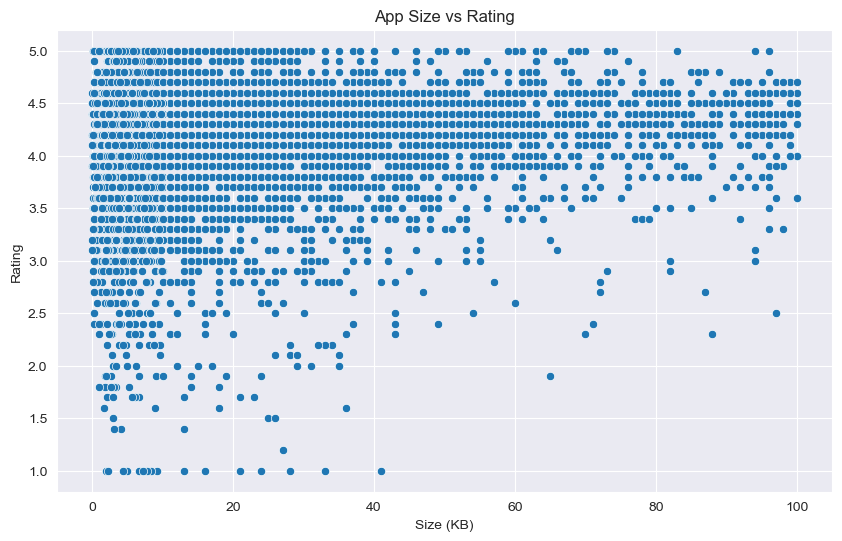

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df_apps['Size'],df_apps['Rating'])
plt.title('App Size vs Rating')
plt.xlabel('Size (KB)')
plt.ylabel('Rating')
plt.show()


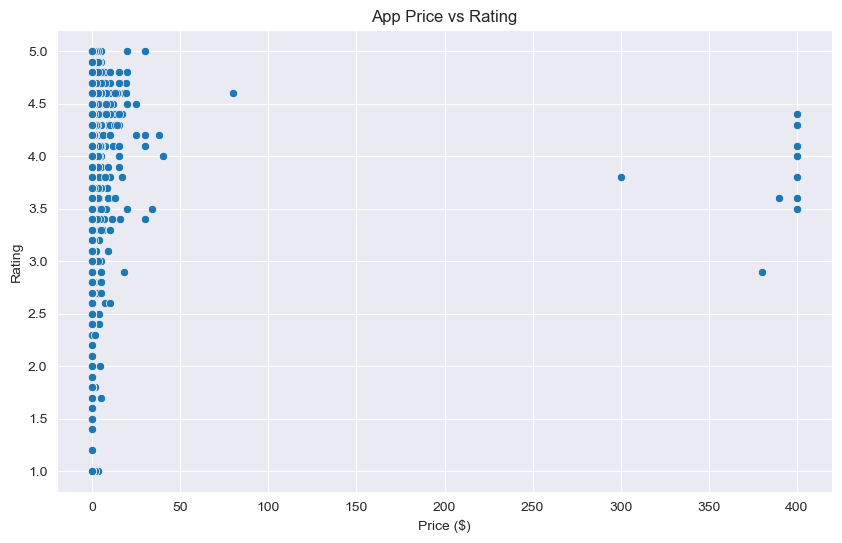

In [28]:
# Price vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(df_apps['Price'], df_apps['Rating'])
plt.title('App Price vs Rating')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.show()

# 4.Sentiment Analysis:
Assess user sentiments through reviews.

In [32]:
df_reviews=pd.read_csv('user_reviews.csv')
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [33]:
df=df_apps.merge(df_reviews,on="App")
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [42]:
# Drop NA values from Sentiment and Review columns
df = df.dropna(subset = ['Sentiment','Reviews'])

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

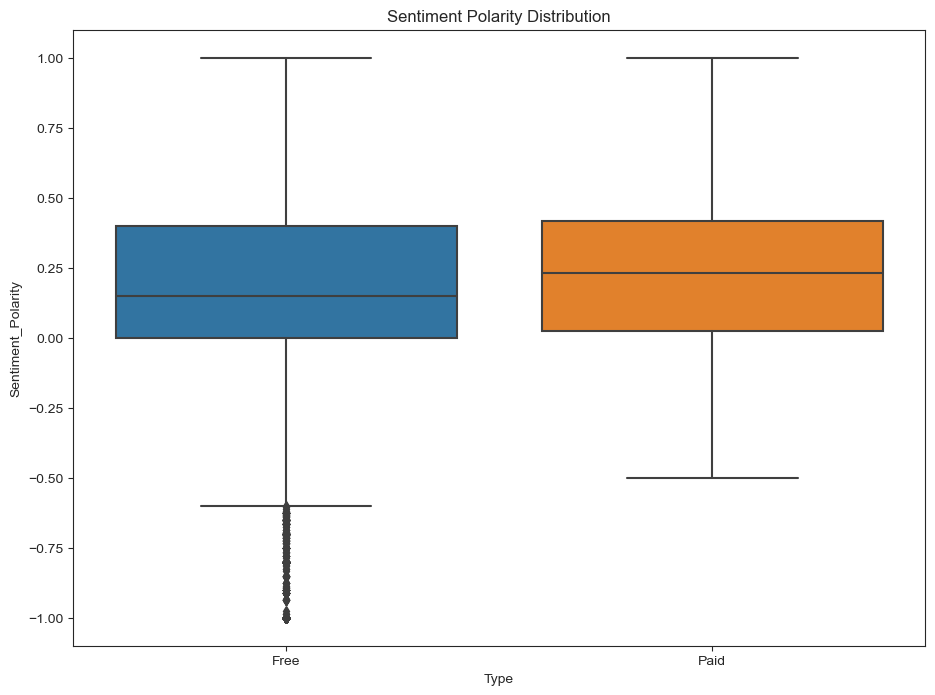

In [46]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y ='Sentiment_Polarity' , data =df)
ax.set_title('Sentiment Polarity Distribution')

# 5.Interactive Visualization:

In [49]:
import plotly.express as px

# Interactive scatter plot: Rating vs. Reviews
fig = px.scatter(df, x='Reviews', y='Rating', color='Category',
                 title='Rating vs. Reviews by Category',
                 labels={'Reviews': 'Number of Reviews', 'Rating': 'App Rating'})
fig.show()

# Interactive bar plot: App Distribution
category_counts = df['Category'].value_counts()
fig = px.bar(category_counts, x=category_counts.index, y=category_counts.values,
             title='App Distribution Across Categories',
             labels={'index': 'Category', 'y': 'Number of Apps'})
fig.show()


In [53]:
# Clean and prepare data
df.dropna(inplace=True)
df['Reviews'] = df['Reviews'].astype(int)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Filter out non-numeric values from 'Rating' and 'Reviews'
df = df[pd.to_numeric(df['Rating'], errors='coerce').notnull()]
df['Rating'] = df['Rating'].astype(float)

# Find app with the highest rating
highest_rating_app = df.loc[df['Rating'].idxmax()]

# Find app with the lowest rating
lowest_rating_app = df.loc[df['Rating'].idxmin()]

# Find app with the highest number of reviews
highest_reviews_app = df.loc[df['Reviews'].idxmax()]

# Find app with the lowest number of reviews
lowest_reviews_app = df.loc[df['Reviews'].idxmin()]

# Display the results
print("App with the Highest Rating:")
print(highest_rating_app[['App', 'Rating', 'Reviews']])
print("\nApp with the Lowest Rating:")
print(lowest_rating_app[['App', 'Rating', 'Reviews']])
print("\nApp with the Highest Number of Reviews:")
print(highest_reviews_app[['App', 'Rating', 'Reviews']])
print("\nApp with the Lowest Number of Reviews:")
print(lowest_reviews_app[['App', 'Rating', 'Reviews']])


App with the Highest Rating:
App        CDL Practice Test 2018 Edition
Rating                                4.9
Reviews                              7774
Name: 548, dtype: object

App with the Lowest Rating:
App        Anthem BC Anywhere
Rating                    2.6
Reviews                   496
Name: 37955, dtype: object

App with the Highest Number of Reviews:
App        Clash of Clans
Rating                4.6
Reviews          44891723
Name: 24941, dtype: object

App with the Lowest Number of Reviews:
App        DIY On A Budget
Rating                 4.7
Reviews                114
Name: 20899, dtype: object


# 6.Skill Enhancement:

## App with the Highest Rating:
App        CDL Practice Test 2018 Edition
Rating                                4.9
Reviews                              7774

## App with the Lowest Rating:
App        Anthem BC Anywhere
Rating                    2.6
Reviews                   496

## App with the Highest Number of Reviews:
App        Clash of Clans
Rating                4.6
Reviews          44891723

## App with the Lowest Number of Reviews:
App        DIY On A Budget
Rating                 4.7
Reviews                114

Games category have highest number of apps and Comics have lowest number of apps